# Chapter 14: Recurrent Neural Networks

Recurrent neural networks (RNNs) are a particular type of artificial neural network which are able to accurately make predictions about sequences of data. They are useful for _natural language processing_ (NLP), automatic translation, speech-to-text, or _sentiment analysis_.

Some RNNs such as [Google's Magenta project](https://cdn2.vox-cdn.com/uploads/chorus_asset/file/6577761/Google_-_Magenta_music_sample.0.mp3) are capable of writing their own melodies. RNNs can [generate sentences](https://karpathy.github.io/2015/05/21/rnn-effectiveness/), [image captions](https://arxiv.org/pdf/1411.4555v2.pdf), and more.

## Recurrent Neurons

Up until now, we have looked mainly at feed-forward neural networks where data only flows in one direction. Neurons in an RNN depend not only on the input data, but also the outputs of the neurons at previous iterations of the sequence of data. At each _time step_ (or _frame_), the _recurrent neuron_ receives the input, $\mathbf{x}_{(t)}$, as well as its output in the previous frame, $y_{(t-1)}$. The output of a layer of recurrent neurons is given by

$$ \mathbf{y}_{(t)} = \phi\left( \mathbf{W}_x^{\,T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_y^{\,T} \cdot \mathbf{y}_{(t-1)} + \mathbf{b} \right) $$

where

- $\mathbf{W}_x$ and $\mathbf{W}_y$ are the weight matrices of the recurrent neuron layer.

- $\mathbf{y}_{(t-1)}$ is the output of the layer at the previous frame.

- $\mathbf{b}$ is the bias vector.

- $\phi$ is the layer's activation function.

While training the RNN, you can compute the output of a whole mini-batch in one computation given by

$$ \mathbf{Y}_{(t)} = \phi\left( \mathbf{X}_{(t)} \cdot \mathbf{W}_x + \mathbf{Y}_{(t-1)} \cdot \mathbf{W}_y + \mathbf{b} \right)$$
$$ = \phi\left( \left[ \mathbf{X}_{(t)} \; \mathbf{Y}_{(t-1)} \right] \cdot \mathbf{W} + \mathbf{b} \right) \;\; \text{with} \;\; \mathbf{W} = \left[ \begin{matrix} \mathbf{W}_x \\ \mathbf{W}_y \end{matrix} \right] $$

where

- $\mathbf{Y}_{(t)}$ is an $m \times n_\text{neurons}$ matrix containing the layer's outputs at frame $t$.

- $\mathbf{X}_{(t)}$ is an $m \times n_\text{inputs}$ matrix containing the inputs of all instances in the mini-batch at frame $t$.

- $\mathbf{W}_x$ is an $n_\text{inputs} \times n_\text{neurons}$ matrix containing the connection weights for the inputs at the current frame.

- $\mathbf{W}_y$ is an $n_\text{neurons} \times n_\text{neurons}$ matrix containing the connection weights for the outputs of the previous frame.

- $\mathbf{b}$ is the bias vector of size $n_\text{neurons}$.

- The weights matrices are often concatenated vertically into a single $\left( n_\text{inputs} + n_\text{neurons} \right) \times n_\text{neurons}$ matrix, $\mathbf{W}$.

- The notation $\left[ \mathbf{X}_{(t)} \; \mathbf{Y}_{(t-1)} \right]$ represents the horizontal concatenation of the matrices $\mathbf{X}_{(t)}$ and $\mathbf{Y}_{(t-1)}$.

### Memory Cells

Since the output of a recurrent neuron depends on its previous outputs, one can say it develops a form of _memory_. A part of a neural network which retains state across time steps is called a _memory cell_. A single recurrent neuron or a layer of recurrent neurons is a very _basic cell_.

In general, a cell's state at frame $t$, i.e. $\mathbf{h}_{(t)}$, is a function of the inputs at the frame $t$ as well as the state at the previous time step. In other words,

$$ \mathbf{h}_{(t)} = f \kern-0.15em \left(\mathbf{h}_{(t-1)}, \mathbf{x}_{(t)}\right). $$

The output of the recurrent neuron is also a function of the previous state and the current inputs. In the case of the basic cell, the output is equal to the state at frame $t$, but for other types of memory cells this is not the case.

### Input and Output Sequences

An output of an RNN can be its prediction of the next terms in the input sequence, such as predicting the future stock prices based on their previous prices. For example you can feed it the prices for the last $N$ days and have it predict the prices for $N-1$ days ago up to tomorrow.

You can also have the network ignore all outputs except the last one, this is called a sequence-to-vector RNN. For example, the input could be a movie review and the output could be a measure of the sentiment of the review (positive or negative).

You can also have vector-to-sequence network which takes a single input and outputs a new sequence, e.g. a model which generates captions for images.

Finally, you can have a sequence-to-vector network called an _encoder_, and a vector-to-sequence network called a _decoder_. This two step model, called an Encoder-Decoder, works well for tasks like translating languages. In fact they outperform sequence-to-sequence RNNs for that particular task.

## Basic RNNs in TensorFlow

Below is an example of an RNN composed of a single layer of 5 recurrent neurons over only two time steps:

In [0]:
import tensorflow as tf

n_inputs = 3
n_neurons = 5

graph = tf.Graph()

with graph.as_default():
  X0 = tf.placeholder(tf.float32, [None, n_inputs])
  X1 = tf.placeholder(tf.float32, [None, n_inputs])

  Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],
                                    dtype=tf.float32))
  Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons],
                                    dtype=tf.float32))
  b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

  Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
  Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

  init = tf.global_variables_initializer()

In [0]:
# Creating input for the model and evaluating the output.

import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [0]:
Y0_val  # output at t = 0

array([[-0.99665046, -0.9380278 , -0.9400478 ,  0.9999989 , -0.99546623],
       [-0.9999979 , -0.9568008 , -0.24366519,  1.        , -1.        ],
       [-1.        , -0.9699753 ,  0.8457766 ,  1.        , -1.        ],
       [ 0.9268941 ,  0.962048  ,  1.        ,  0.9999978 , -0.97702247]],
      dtype=float32)

In [0]:
Y1_val  # output at t = 1

array([[-1.        ,  0.9794915 ,  0.9999994 ,  1.        , -1.        ],
       [-0.99533135,  0.83910245,  0.7614274 , -0.9989953 , -0.99223953],
       [-0.99999666,  0.991496  ,  0.9999381 ,  1.        , -1.        ],
       [ 0.48690912,  0.99922407, -0.624821  ,  0.99997604, -0.9999502 ]],
      dtype=float32)

### Static Unrolling Through Time

In [0]:
# The following code creates the same exact RNN, but without the need to repeat
# code for every time step.

graph = tf.Graph()

with graph.as_default():
  X0 = tf.placeholder(tf.float32, [None, n_inputs])
  X1 = tf.placeholder(tf.float32, [None, n_inputs])

  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                  dtype=tf.float32)
  Y0, Y1 = output_seqs

  init = tf.global_variables_initializer()

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

print(Y0_val)
print(Y1_val)

[[-0.11027845  0.16481912 -0.72981983  0.09496021  0.9231393 ]
 [ 0.55100393  0.9053233  -0.9958435   0.12013794  0.99927986]
 [ 0.87414116  0.9931363  -0.9999445   0.14516197  0.9999935 ]
 [ 0.9723743   0.9928955   0.18267712 -0.9885102  -0.93694633]]
[[ 0.9873044   0.997075   -0.99998695  0.47318375  0.99998796]
 [ 0.14860196 -0.11929104  0.04387099  0.6094722   0.14440648]
 [ 0.9513218   0.98688716 -0.9965694   0.5990944   0.99599034]
 [ 0.14174876  0.9881616  -0.54004556  0.22489133 -0.56519246]]


Since it is not convenient to write a new input placeholder for each frame of the sequence, TensorFlow provides the `static_rnn()` function to let you be able to train RNNs with a variable number of frames. It returns two objects, a Python list of the output sequences and the final states of the network. For basic cells, the final state is the final output of the network.

In [0]:
n_steps = 2

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  # Unstack separates a tensor or rank r into a List of tensors of rank r - 1.
  X_seqs = tf.unstack(tf.transpose(X, perm=(1, 0, 2)))
  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                  dtype=tf.float32)
  outputs = tf.transpose(tf.stack(output_seqs), perm=(1, 0, 2))
  init = tf.global_variables_initializer()

In [0]:
X_batch = np.array([
  [[0, 1, 2], [9, 8, 7]],
  [[3, 4, 5], [0, 0, 0]],
  [[6, 7, 8], [6, 5, 4]],
  [[9, 0, 1], [3, 2, 1]],
])

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [0]:
print(outputs_val)

[[[-0.6090447  -0.85558575 -0.5314583  -0.9463975  -0.38466096]
  [ 0.32716164  0.5490635   0.98903656 -1.          0.12383044]]

 [[-0.57317054 -0.90847534  0.22860385 -0.99999297 -0.55318004]
  [-0.34147602  0.18631878 -0.5940684  -0.23706213  0.5830268 ]]

 [[-0.5349562  -0.9425942   0.7847463  -1.         -0.6860129 ]
  [ 0.5175554   0.7839577   0.8809261  -0.9999995   0.682054  ]]

 [[ 0.99997467  0.9999173   0.9999367  -0.99648136 -0.9216329 ]
  [ 0.96882105  0.98954546  0.9811846  -0.99105215  0.61447096]]]


The `static_rnn()` function creates a new graph node for each cell for each frame. This means that for sequences with a large number of frames, you risk the graph causing an out of memory (OOM) error. Thankfully there is the `dynamic_rnn()` function.

### Dynamic Unrolling Through Time

The `dynamic_rnn()` function uses a `while_loop()` operation to run over the cell the appropriate number of times and can swap memory between the GPU and CPU using the `swap_memory=True` parameter. The `dynamic_rnn()` function also accepts a single Tensor for all inputs, meaning you do not need to do any stacking like in the last example.

In [0]:
graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

### Handling Variable Length Input Sequences

In order to handle inputs of variable length, such as sentences, you can use set the `sequence_length` parameter of the `dynamic_rnn()` as a 1D tensor which indicates the length of the each input sequence. Below is an example:

In [0]:
graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  seq_length = tf.placeholder(tf.int32, shape=(None))
  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                      sequence_length=seq_length)
  init = tf.global_variables_initializer()

Each input sequence which is shorter than the maximum length sequence, it must be padded with zeros at the end. Below is an example where the second sequence has only 1 frame whereas the others have two.

In [0]:
X_batch = np.array([
  [[0, 1, 2], [9, 8, 7]],
  [[3, 4, 5], [0, 0, 0]],
  [[6, 7, 9], [6, 5, 4]],
  [[9, 0, 1], [3, 2, 1]],
])
seq_length_batch = np.array([2, 1, 2, 2])

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch,
                                          seq_length: seq_length_batch})

In [0]:
print(outputs_val)

[[[ 0.09361071 -0.709874    0.9530612   0.51667666  0.7338599 ]
  [-0.9999901  -0.9981038   0.99997145 -0.9994148   0.9999968 ]]

 [[-0.97887295 -0.986903    0.9994627  -0.3352392   0.9973377 ]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.99960613 -0.9996845   0.9999982  -0.702879    0.9999872 ]
  [-0.9997664  -0.9207451   0.9991688  -0.9962711   0.9986727 ]]

 [[-0.99960387  0.59676987 -0.9990039  -0.99925125  0.929653  ]
  [-0.999578   -0.38266394 -0.13775218 -0.66091883  0.686193  ]]]


### Handling Variable-Length Output Sequences

If the output sequence has a variable length, such as when you are translating sentences into another language, in general it is not possible to set a `sequence_length` during training. The most common solution is to define an _end-of-sequence_ (EOS) character, so that any output beyond that character is ignored.

## Training RNNs

The trick for training RNNs is to unroll them through time and then use backpropagation on the unrolled graph. This strategy is called _backpropagation through time_ (BPTT). The RNN first computes the output using forward propagation, then the output is evaluated using a cost function

$$ C \left( \mathbf{Y}_{t_\text{min}}, \mathbf{Y}_{t_\text{min}+1}, ..., \mathbf{Y}_{t_\text{max}} \right) $$

where $t_\text{min}$ and $t_\text{max}$ are the minimum and maximum output time steps (not including ignored outputs earlier in the sequence). The model then uses backpropagation to compute the error gradients and uses this to update the model parameters. If the outputs from some time steps are ignored, they do not contribute to the error gradient during training. However, since all time steps share the same parameters ($\mathbf{W}$ and $\mathbf{b}$), backpropagation will still sum over all time steps.

### Training a Sequence Classifier

Below is an example of training a RNN to classify images in the MNIST dataset. Even though convolutional neural networks (see Chapter 13) are better for image classification, this familiar example is useful for demonstrative purposes.

In [0]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.int32, (None))

  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

  logits = tf.layers.dense(states, n_outputs)
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                            logits=logits)
  loss = tf.reduce_mean(xentropy)
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def shuffle_batch(X, y, batch_size):
  rnd_idx = np.random.permutation(len(X))
  n_batches = len(X) // batch_size
  for batch_idx in np.array_split(rnd_idx, n_batches):
    X_batch, y_batch = X[batch_idx], y[batch_idx]
    yield X_batch, y_batch

In [0]:
X_test = X_test.reshape((-1, n_steps, n_inputs))

In [0]:
n_epochs = 100
batch_size = 150

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
          X_batch = X_batch.reshape((-1, n_steps, n_inputs))
          sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      if epoch % 5 == 0:
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, 'Train accuracy:', acc_train, 'Test accuracy:', acc_test)
    acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    print('Train accuracy:', acc_train, 'Test accuracy:', acc_test)

0 Train accuracy: 0.30666667 Test accuracy: 0.2735
5 Train accuracy: 0.6666667 Test accuracy: 0.7017
10 Train accuracy: 0.8 Test accuracy: 0.7769
15 Train accuracy: 0.7733333 Test accuracy: 0.815
20 Train accuracy: 0.76666665 Test accuracy: 0.8374
25 Train accuracy: 0.85333335 Test accuracy: 0.8512
30 Train accuracy: 0.8666667 Test accuracy: 0.8635
35 Train accuracy: 0.86 Test accuracy: 0.8717
40 Train accuracy: 0.87333333 Test accuracy: 0.8794
45 Train accuracy: 0.9066667 Test accuracy: 0.8875
50 Train accuracy: 0.9066667 Test accuracy: 0.8943
55 Train accuracy: 0.93333334 Test accuracy: 0.8988
60 Train accuracy: 0.9066667 Test accuracy: 0.9046
65 Train accuracy: 0.93333334 Test accuracy: 0.9088
70 Train accuracy: 0.9 Test accuracy: 0.9129
75 Train accuracy: 0.9066667 Test accuracy: 0.9151
80 Train accuracy: 0.88666666 Test accuracy: 0.9182
85 Train accuracy: 0.87333333 Test accuracy: 0.9205
90 Train accuracy: 0.9533333 Test accuracy: 0.9237
95 Train accuracy: 0.92 Test accuracy: 0.92

The model achieves 92% accuracy, which is not too great compared to CNNs.

### Training to Predict Time Series

Training an RNN with a single layer of 100 neurons. We will unroll it over 20 time steps where each input is a single feature. The target set is also sequences of 20 single features. It uses an `OutputProjectionWrapper` which adds a set of fully connected layer of linear neurons (with no activation function) on top of each output, separate from the cell state. They each have shared weights and biases that the model learns during training. 

In [0]:
# This code generates the time series we will be predicting.

t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
  return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
  t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
  ts = t0 + np.arange(0., n_steps + 1) * resolution
  ys = time_series(ts)
  return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

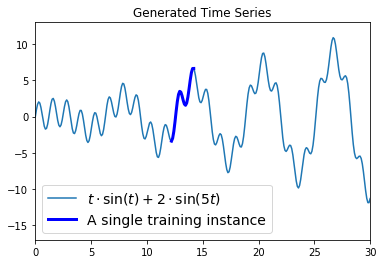

In [0]:
# Displaying the generated time series.

import matplotlib.pyplot as plt

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.title('Generated Time Series')
plt.plot(t, time_series(t), label='$t \cdot \sin(t) + 2 \cdot \sin(5t) $')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'b-', linewidth=3,
         label='A single training instance')
plt.legend(loc='lower left', fontsize=14)
plt.axis([0, 30, -17, 13])
plt.show()

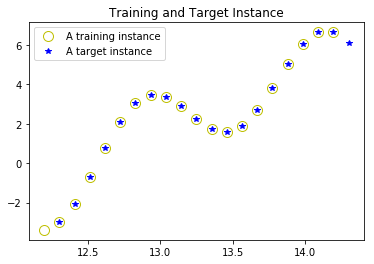

In [0]:
# Plotting a training instance and target instance.

plt.title('Training and Target Instance')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'yo', markersize=10,
         label='A training instance', mfc='none')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'b*',
         label='A target instance')
plt.legend(loc='upper left')
plt.show()

In [0]:
# Defining the model graph.

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  cell = tf.contrib.rnn.OutputProjectionWrapper(
      tf.contrib.rnn.BasicRNNCell(n_neurons, dtype=tf.float32),
      output_size=n_outputs)
  outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
  loss = tf.reduce_mean(tf.square(outputs - y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)
  saver = tf.train.Saver()
  init = tf.global_variables_initializer()

In [0]:
# Training the model.

n_iterations = 1500
batch_size = 50

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
      X_batch, y_batch = next_batch(batch_size, n_steps)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      if iteration % 100 == 0:
        mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
        print(iteration, '\tMSE:', mse)
    saver.save(sess, './time_series_model.ckpt')

0 	MSE: 6.411005
100 	MSE: 0.16381922
200 	MSE: 0.1004788
300 	MSE: 0.09948104
400 	MSE: 0.067138985
500 	MSE: 0.053131722
600 	MSE: 0.05142671
700 	MSE: 0.051950794
800 	MSE: 0.046649255
900 	MSE: 0.041033357
1000 	MSE: 0.041259483
1100 	MSE: 0.0491628
1200 	MSE: 0.046915524
1300 	MSE: 0.030991608
1400 	MSE: 0.04567743


W0623 17:02:41.489811 139727458785152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


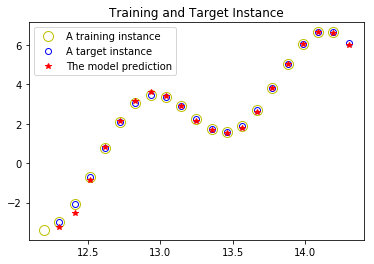

In [0]:
# Plotting the prediction of the model.

plt.title('Training and Target Instance')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'yo', markersize=10,
         label='A training instance', mfc='none')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'bo', mfc='none',
         label='A target instance')

with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    X_new = time_series(
        np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

plt.plot(t_instance[1:], y_pred[0,:,0], 'r*', label='The model prediction')
plt.legend(loc='upper left')
plt.show()

It is possible to predict a time series without the `OutputProjectionMapper` in a more complex, but more efficient way. You can stack the RNN outputs at each time step (whos shape is originally `[batch_size, n_steps, n_neurons]`) into the shape `[batch_size * n_steps, n_neurons]`, then it applies a single, fully connected layer with the right output size. The result will have the shape `[batch_size * n_steps, n_outputs]` so we will reshape it to `[batch_size, n_steps, n_outputs]`. Below is a code example which uses this method on the same task as above: 

In [0]:
graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.float32, (None, n_steps, n_outputs))

  cell = tf.contrib.rnn.BasicRNNCell(n_neurons, dtype=tf.float32)
  rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

  stacked_rnn_outputs = tf.reshape(rnn_outputs, (-1, n_neurons))
  stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
  outputs = tf.reshape(stacked_outputs, (-1, n_steps, n_outputs))

  loss = tf.reduce_mean(tf.square(outputs - y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)

  saver = tf.train.Saver()
  init = tf.global_variables_initializer()

In [0]:
n_iterations = 1500
batch_size = 50

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
      X_batch, y_batch = next_batch(batch_size, n_steps)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      if iteration % 100 == 0:
        mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
        print(iteration, '\tMSE:', mse)
    saver.save(sess, './time_series_model.ckpt')

0 	MSE: 5.2654705
100 	MSE: 0.15096399
200 	MSE: 0.09492157
300 	MSE: 0.066475175
400 	MSE: 0.066429205
500 	MSE: 0.058345262
600 	MSE: 0.057457153
700 	MSE: 0.05763044
800 	MSE: 0.051058687
900 	MSE: 0.043907426
1000 	MSE: 0.041824494
1100 	MSE: 0.05195636
1200 	MSE: 0.038754582
1300 	MSE: 0.040157363
1400 	MSE: 0.047211897


### Creative RNN

We can have the model generate an entirely new series. We first train the model (or used the trained model above). Then we provide it a seed sequence, it could be a training instance or a sequence of zeros. We have the model predict the last step in the sequence, then you feed it the next `n_steps` and then the model predicts the next term in the sequence. You can repeat this process to generate an entirely new sequence.

In [0]:
# Seeding it with a sequence of zeros.

sequence = [0.0] * n_steps
with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    for iteration in range(300):
      X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
      y_pred = sess.run(outputs, feed_dict={X: X_batch})
      sequence.append(y_pred[0,-1,0])

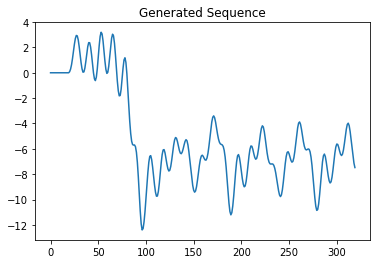

In [0]:
# Plotting the result.

plt.plot(np.arange(len(sequence)), sequence)
plt.title('Generated Sequence')
plt.show()

In [0]:
# Repeating the same task, but using a training instance as the seed.

sequence = [time_series((i * resolution) + t_min + t_max - (t_min / 3))
            for i in range(n_steps)]
with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    for iteration in range(300):
      X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
      y_pred = sess.run(outputs, feed_dict={X: X_batch})
      sequence.append(y_pred[0,-1,0])

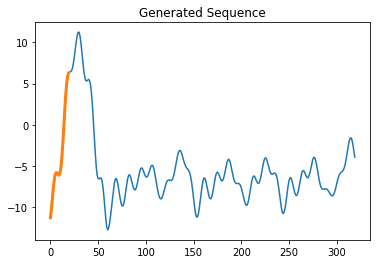

In [0]:
# Plotting the result.

plt.plot(np.arange(len(sequence)), sequence)
plt.plot(np.arange(n_steps), sequence[:n_steps], linewidth=3)
plt.title('Generated Sequence')
plt.show()

## Deep RNNs

A _deep RNN_ is one that stacks multiple layers of cells. Below is an example of a deep RNN which uses the `MultiRNNCell`.

In [0]:
n_steps = 28
n_inputs = 28
n_outputs = 10
n_neurons = 100
n_layers = 3
learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.int32, (None))
  layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons,
                                        activation=tf.nn.relu)
            for layer in range(n_layers)]
  multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
  outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
  flattened_states = tf.concat(axis=1, values=states)
  logits = tf.layers.dense(flattened_states, n_outputs)
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                            logits=logits)
  loss = tf.reduce_mean(xentropy)
  optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()

In [0]:
n_epochs = 25
batch_size = 150

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
          X_batch = X_batch.reshape((-1, n_steps, n_inputs))
          sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
      acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
      print(epoch, 'Train accuracy:', acc_train, 'Test accuracy:', acc_test)

0 Train accuracy: 0.16 Test accuracy: 0.0988
1 Train accuracy: 0.10666667 Test accuracy: 0.1028
2 Train accuracy: 0.2 Test accuracy: 0.1658
3 Train accuracy: 0.28 Test accuracy: 0.277
4 Train accuracy: 0.58 Test accuracy: 0.5484
5 Train accuracy: 0.56666666 Test accuracy: 0.616
6 Train accuracy: 0.70666665 Test accuracy: 0.6644
7 Train accuracy: 0.7 Test accuracy: 0.6986
8 Train accuracy: 0.75333333 Test accuracy: 0.715
9 Train accuracy: 0.74 Test accuracy: 0.7302
10 Train accuracy: 0.74666667 Test accuracy: 0.7419
11 Train accuracy: 0.74666667 Test accuracy: 0.7452
12 Train accuracy: 0.76 Test accuracy: 0.7556
13 Train accuracy: 0.74 Test accuracy: 0.7601
14 Train accuracy: 0.73333335 Test accuracy: 0.7647
15 Train accuracy: 0.7133333 Test accuracy: 0.7717
16 Train accuracy: 0.79333335 Test accuracy: 0.7761
17 Train accuracy: 0.7866667 Test accuracy: 0.7824
18 Train accuracy: 0.85333335 Test accuracy: 0.789
19 Train accuracy: 0.79333335 Test accuracy: 0.793
20 Train accuracy: 0.753333

### Distributing a Deep RNN Across Multiple Devices

In [0]:
# The following code will not work since BasicRNNCell is not an actual cell
# itself, rather it is a cell factory, it does not produce any cells by itself.

with tf.device('/gpu:0'):
  layer1 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

with tf.device('/gpu:1'):
  layer2 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [0]:
# The proper way to distribute an RNN.

class DeviceCellWrapper(tf.contrib.rnn.RNNCell):
  def __init__(self, device, cell):
    self._cell = cell
    self._device = device
  
  @property
  def state_size(self):
    return self._cell.state_size
  
  @property
  def output_size(self):
    return self._cell.output_size
  
  def __call__(self, inputs, state, scope=None):
    with tf.device(self._device):
      return self._cell(inputs, state, scope)

In [0]:
# Using the new factory in a graph.

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  devices = ['/gpu:0', '/gpu:1', '/gpu:2']
  cells = [
    DeviceCellWrapper(dev, tf.contrib.rnn.BasicRNNCell(num_units=n_neurons))
    for dev in devices
  ]
  multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
  outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

### Applying Dropout

In order to prevent a deep RNN from overfitting, we are going to add dropout.

In [0]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  y = tf.placeholder(tf.float32, (None, n_steps, n_outputs))
  keep_prob = tf.placeholder_with_default(1.0, shape=())
  cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
          for _ in range(n_layers)]
  cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
                for cell in cells]
  multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
  rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

  # Same code as before...
  stacked_rnn_outputs = tf.reshape(rnn_outputs, (-1, n_neurons))
  stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
  outputs = tf.reshape(stacked_outputs, (-1, n_steps, n_outputs))

  loss = tf.reduce_mean(tf.square(outputs - y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)

  saver = tf.train.Saver()
  init = tf.global_variables_initializer()

In [0]:
n_iterations = 1500
batch_size = 50

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
      X_batch, y_batch = next_batch(batch_size, n_steps)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch, keep_prob: 0.5})
      if iteration % 100 == 0:
        mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
        print(iteration, '\tMSE:', mse)
    saver.save(sess, './time_series_model.ckpt')

0 	MSE: 6.5285077
100 	MSE: 7.3145056
200 	MSE: 3.946455
300 	MSE: 4.4973884
400 	MSE: 4.4277353
500 	MSE: 3.601671
600 	MSE: 6.909885
700 	MSE: 3.597215
800 	MSE: 4.8298016
900 	MSE: 4.8115706
1000 	MSE: 5.5882745
1100 	MSE: 5.686043
1200 	MSE: 5.1127477
1300 	MSE: 5.146654
1400 	MSE: 3.7375762


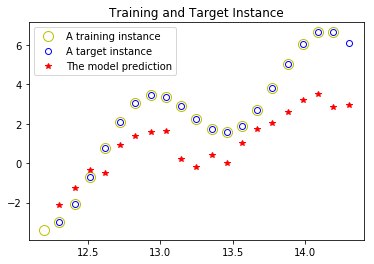

In [0]:
# Plotting the prediction of the model with dropout.
# For this example, dropout made the model perform worse.

plt.title('Training and Target Instance')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'yo', markersize=10,
         label='A training instance', mfc='none')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'bo', mfc='none',
         label='A target instance')

with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    X_new = time_series(
        np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

plt.plot(t_instance[1:], y_pred[0,:,0], 'r*', label='The model prediction')
plt.legend(loc='upper left')
plt.show()

### The Difficulty of Training over Many Times

Training RNNs to predict long sequences can be difficult because the unrolled network is very deep and can suffer from the vanishing/exploding gradients problem. Many tricks can that were discussed in Chapter 11 can be used (e.g. nonsaturating activation functions, Batch Normalization, Gradient Clipping, and better optimizers). However, training RNNs with sequences that have even 100 time steps can be very slow.

One method is to unroll the RNN for only a few time steps, this is called _truncated backpropagation through time_. In TensorFlow, this would be equivalent to reducing the `n_steps` parameter. However, if you do this, the model will have a hard time learning patterns over longer spans of time steps.

Another problem faced by basic RNN cells is that they forget the patterns they learned from the earliest input. This can be a problem, so different cells have been developed to store patterns over long spans of time steps. The most common is the LSTM cell, discussed below.

## LSTM Cell

The _Long Short-Term Memory_ (LSTM) cell [was first proposed by Sepp Hochreiter and Jürgen Schmidhuber](https://www.mitpressjournals.org/doi/abs/10.1162/neco.1997.9.8.1735#.WIxuWvErJnw) and was improved by Alex Graves, [Hasim Sak,](https://arxiv.org/pdf/1402.1128.pdf) [Wojciech Zaremba,](https://arxiv.org/pdf/1409.2329v5.pdf) and more. Below is a graph representation of an LSTM. 

<img src="https://i.imgur.com/CO2UNLZ.png" width="600">

The cell uses two state vectors: a short-term state, $\mathbf{h}_{(t)}$, and a long-term state, $\mathbf{c}_{(t)}$. Below is a description of the different values in the graph:

- The main layer is the one that outputs $\mathbf{g}_{(t)}$. It uses the current inputs, $\mathbf{x}_{(t)}$, and the previous short term state, i.e. $\mathbf{h}_{(t-1)}$. In a basic cell, this layer's output would be saved as the current output, $\mathbf{y}_{(t)}$ and the next short-term state, $\mathbf{h}_{(t)}$. However, in an LSTM, the situation is more complex.

- The three other fully connected layers are called _gate controllers_. Since they use the logistic activation function, their outputs range from 0 to 1 and are fed to multiplication operations. Below is a description of each gate:

    - The _forget gate_, controlled by $\mathbf{f}_{(t)}$, controls which parts of the long-term state should be forgotten after this time step.

    - The _input gate_, controlled by $\mathbf{i}_{(t)}$, controls what parts of $\mathbf{g}_{(t)}$ is added to the new long-term state.

    - The _output gate_, controlled by $\mathbf{o}_{(t)}$ controls what part of the long-term state should influence the new short-term state.

This combination of components allow the LSTM to learn patterns in the data in the short-term and long-term, and it also learns which long term patterns it does not need to make predictions.

Below is a mathematical description of how each term is computed:

$$ \mathbf{i}_{(t)} = \sigma\left( \mathbf{W}_{xi}^{\;\;T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_{hi}^{\;\;T} \cdot \mathbf{h}_{(t-1)} + \mathbf{b}_i \right) $$

$$ \mathbf{f}_{(t)} = \sigma\left( \mathbf{W}_{xf}^{\;\;\,T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_{hf}^{\;\;\,T} \cdot \mathbf{h}_{(t-1)} + \mathbf{b}_f \right) $$

$$ \mathbf{o}_{(t)} = \sigma\left( \mathbf{W}_{xo}^{\;\;T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_{ho}^{\;\;T} \cdot \mathbf{h}_{(t-1)} + \mathbf{b}_o \right) $$

$$ \mathbf{g}_{(t)} = \tanh\left( \mathbf{W}_{xg}^{\;\;T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_{hg}^{\;\;T} \cdot \mathbf{h}_{(t-1)} + \mathbf{b}_g \right) $$

$$ \mathbf{c}_{(t)} = \mathbf{f}_{(t)} \otimes \mathbf{c}_{(t-1)} + \mathbf{i}_{(t)} \otimes \mathbf{g}_{(t)} $$

$$ \mathbf{y}_{(t)} = \mathbf{h}_{(t)} = \mathbf{o}_{(t)} \otimes \tanh\left(  \mathbf{c}_{(t)} \right) $$

Where:

- $\mathbf{W}_{xi}$, $\mathbf{W}_{xf}$, $\mathbf{W}_{xo}$, $\mathbf{W}_{xg}$ are the weight matrices for each of the four layers for their connection to the input vector $\mathbf{x}_{(t)}$

- $\mathbf{W}_{hi}$, $\mathbf{W}_{hf}$, $\mathbf{W}_{ho}$, $\mathbf{W}_{hg}$ are the weight matrices for each of the four layers for their connection to the previous short-term state, $\mathbf{h}_{(t-1)}$.

- $\mathbf{b}_i$, $\mathbf{b}_f$, $\mathbf{b}_o$, $\mathbf{b}_g$ are tihe bias terms for each of the four layers. Note that TensorFlow initializes this as a vector of 1's instead of a vector of 0's.

Below is an example where we train an RNN to predict the MNIST dataset using an LSTM cell.



In [0]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  y = tf.placeholder(tf.int32, shape=(None))

  lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
                for _ in range(n_layers)]
  multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
  outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
  top_layer_h_states = states[-1][1]
  logits = tf.layers.dense(top_layer_h_states, n_outputs)

  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                            logits=logits)
  loss = tf.reduce_mean(xentropy)
  optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()

In [0]:
n_epochs = 25
batch_size = 150

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
          X_batch = X_batch.reshape((-1, n_steps, n_inputs))
          sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
      acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
      print(epoch, 'Train accuracy:', acc_train, 'Test accuracy:', acc_test)

0 Train accuracy: 0.29333332 Test accuracy: 0.2762
1 Train accuracy: 0.33333334 Test accuracy: 0.3251
2 Train accuracy: 0.27333334 Test accuracy: 0.3293
3 Train accuracy: 0.38 Test accuracy: 0.3793
4 Train accuracy: 0.4 Test accuracy: 0.3994
5 Train accuracy: 0.44666666 Test accuracy: 0.4356
6 Train accuracy: 0.41333333 Test accuracy: 0.4719
7 Train accuracy: 0.52666664 Test accuracy: 0.5064
8 Train accuracy: 0.5466667 Test accuracy: 0.5362
9 Train accuracy: 0.5733333 Test accuracy: 0.5584
10 Train accuracy: 0.56666666 Test accuracy: 0.5822
11 Train accuracy: 0.6066667 Test accuracy: 0.605
12 Train accuracy: 0.64666665 Test accuracy: 0.6276
13 Train accuracy: 0.64666665 Test accuracy: 0.6471
14 Train accuracy: 0.6333333 Test accuracy: 0.6608
15 Train accuracy: 0.67333335 Test accuracy: 0.6755
16 Train accuracy: 0.6533333 Test accuracy: 0.6895
17 Train accuracy: 0.68 Test accuracy: 0.701
18 Train accuracy: 0.7 Test accuracy: 0.7133
19 Train accuracy: 0.67333335 Test accuracy: 0.7251
20 

### Peephole Connections

Normally in an LSTM cell, the four fully connected layers take the input vector for the current time step, $\mathbf{x}_{(t)}$, and the short-term memory state from the previous step, $\mathbf{h}_{(t-1)}$. [Felix Gers and Jürgen Schmidhuber proposed](https://ieeexplore.ieee.org/document/861302) and LSTM with extra connections (called _peephole connections_): the previous long-term state, $\mathbf{c}_{(t-1)}$ is added as an inmput of the controllers of the forget gate and the input gate and the current long-term state, $\mathbf{c}_{(t)}$ is added as input to the controller of the output gate.

In [0]:
# Example of an LSTM cell with peephole connections.

lstm_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True)

W0623 17:14:06.013668 139727458785152 deprecation.py:323] From <ipython-input-45-9cc39ee7cf92>:2: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


## GRU Cell

The _Gated Recurrent Unit_ cell was proposed by Kyunghyun Cho et al. [in a 2014 paper](https://arxiv.org/pdf/1406.1078v3.pdf) that also introduced the Encoder-Decoder model mentioned above.

Below is an illustration of a GRU cell:

<img src="https://i.imgur.com/OSgcT31.png" width="600">

The GRU is a simplication of the LSTM cell that tends to work just as well in practice. The simplications are:

- Both the long-term and short-term states are merged into a single vector, $\mathbf{h}_{(t)}$.

- A single gate controls both the forget and input gate. If the gate controller outputs a 1, the forget gate is open and the input gate is closed. If the gate controller outputs a 0, the opposite happens. This ensures that when new memory is stored in the state vector, the some of the old information is forgotten to make room for the new information.

- There is no output gate. The full state vector is output at each step. There is another gate which contorls what parts of the previous state are shown to the main layer, $\mathbf{g}_{(t)}$.

Below is a mathematical summary of the GRU cell:

$$ \mathbf{z}_{(t)} = \sigma\left( \mathbf{W}_{xz}^{\;\;T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_{hz}^{\;\;T} \cdot \mathbf{h}_{(t-1)} + \mathbf{b}_z \right) $$

$$ \mathbf{r}_{(t)} = \sigma\left( \mathbf{W}_{xr}^{\;\;T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_{hr}^{\;\;T} \cdot \mathbf{h}_{(t-1)} + \mathbf{b}_r \right) $$

$$ \mathbf{g}_{(t)} =  \tanh\left( \mathbf{W}_{xg}^{\;\;T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_{hg}^{\;\;T} \cdot \left( \mathbf{r}_{(t)} \otimes \mathbf{h}_{(t-1)} \right) + \mathbf{b}_g \right) $$

$$ \mathbf{h}_{(t)} = \mathbf{z}_{(t)} \otimes \mathbf{h}_{(t-1)} + \left( 1 - \mathbf{z}_{(t)} \right) \otimes \mathbf{g}_{(t)} $$

Below is a code example of how to use a GRU cell in TensorFlow:

In [0]:
gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

W0623 17:14:06.036820 139727458785152 deprecation.py:323] From <ipython-input-46-e122be3b374a>:1: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


## Natural Language Processing

Most state of the art NLP techniques, e.g. machine translation, automatic summarixation, parsing, sentiment analysis, etc. are based (at least in part) on RNNs. In the following section, we examine machine translation. This topic is covered in TensorFlow's [Word2Vec](https://www.tensorflow.org/tutorials/representation/word2vec) and [Seq2Seq](https://www.tensorflow.org/tutorials) tutorials also cover this topic.

### Word Embeddings

First we must choose a representation for words. One option for a 50,000 word dictionary is to use one-hot encoding, which generates a sparse 50,000 dimensional set of basis vectors, but this representation will cause the model to train a large set of parameters so it is not memory efficient.

A common solution is to a use a set of small (e.g. 150 dimensions) and dense vectors called an _embedding_. A model will learn the best representation of the dictionary, i.e. the best _embeddding_, for the particular task.

Below is TensorFlow graph for setting up your model to learn embeddings. One can view finding the ideal embedding as finding the ideal transformation from the sparse representation of the entire dictionary to a denser, smaller dimensional representation which is learned during training.

In [0]:
vocabulary_size = 50000
embedding_size = 150

graph = tf.Graph()

with graph.as_default():
  embeddings = tf.Variable(
      tf.random_uniform((vocabulary_size, embedding_size), -1.0, 1.0))

You can use pretrained word embeddings from other models as well for transfer learning. You can freeze the gradient at different points in the graph and see how it performs.

## Embeddings

Below is an implementation of TensorFlow's [Word2Vec tutorial](https://www.tensorflow.org/tutorials/representation/word2vec) based as well on the code [examples by the book's author](https://github.com/ageron/handson-ml/blob/master/14_recurrent_neural_networks.ipynb).

In [0]:
# Fetching the data for the translator.

from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
  try:
    os.makedirs(path)
  except OSError as e:
    if e.errno == errno.EEXIST and os.path.isdir(path):
      pass
    else:
      raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
  os.makedirs(words_path, exist_ok=True)
  zip_path = os.path.join(words_path, 'words.zip')
  if not os.path.exists(zip_path):
    urllib.request.urlretrieve(words_url, zip_path)
  with zipfile.ZipFile(zip_path) as f:
    data = f.read(f.namelist()[0])
  return data.decode('ascii').split()

In [0]:
words = fetch_words_data()

In [3]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

In [0]:
# Build the word dictionary. Sort the words by most frequent, descending.

from collections import Counter
import numpy as np

vocabulary_size = 50000

vocabulary = [('UNK', None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [5]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [6]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'cycles originated as a term of abuse first used'

In [7]:
words[24], data[24]

('culottes', 0)

In [0]:
# Code to generate batches for training. It takes 3 parameters: the batch size,
# the number 

from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
  global data_idx
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=[batch_size], dtype=np.int32)
  labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
  span = (2 * skip_window) + 1
  buffer = deque(maxlen=span)
  for _ in range(span):
    buffer.append(data[data_idx])
    data_idx = (data_idx + 1) % len(data)
  for i in range(batch_size // num_skips):
    target = skip_window
    targets_to_avoid = [skip_window]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = np.random.randint(0, span)
      targets_to_avoid.append(target)
      batch[(i * num_skips) + j] = buffer[skip_window]
      labels[(i * num_skips) + j, 0] = buffer[target]
    buffer.append(data[data_idx])
    data_idx = (data_idx + 1) % len(data)
  return batch, labels

In [0]:
np.random.seed(42)

In [0]:
data_idx = 0
batch, labels = generate_batch(8, 1, 1)

In [11]:
batch, [vocabulary[word] for word in batch]

(array([3081,   12,    6,  195,    2, 3134,   46,   59], dtype=int32),
 ['originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used'])

In [12]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [3081],
        [ 195],
        [   2],
        [ 195],
        [   2],
        [  59],
        [ 156]], dtype=int32),
 ['as', 'originated', 'term', 'of', 'term', 'of', 'used', 'against'])

In [0]:
# Defining constants for the model.

batch_size = 128
embedding_size = 128
skip_window = 2
num_skips = 1

# Picking a random validation set to sample nearest neighbors. We limit the
# validation samples to be the words with the lowest ID, which means they are
# the most frequent.
valid_size = 16
valid_window = 100
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64

learning_rate = 0.01

vocabulary_size = 50000
embedding_Size = 150

In [0]:
# Build the model.

import tensorflow as tf

graph = tf.Graph()

with graph.as_default():
  train_labels = tf.placeholder(tf.int32, shape=(batch_size, 1))
  valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
  
  # Look up embeddings for inputs.
  init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
  embeddings = tf.Variable(init_embeds)

  train_inputs = tf.placeholder(tf.int32, shape=(None))
  embed = tf.nn.embedding_lookup(embeddings, train_inputs)

  # Constructing variables for NCE loss.
  nce_weights = tf.Variable(
      tf.truncated_normal([vocabulary_size, embedding_size],
                          stddev=1.0 / np.sqrt(embedding_size)))
  nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch. tf.nn.nce_loss() automatically
  # draws a new sample of the negative labels each time. The negative labels
  # are random words which are not adjacent to the actual input word. This
  # helps the model distinguish between words that are good pairs and words that
  # are not, which is less computationally expensive than using softmax to
  # compute output probabilities for the high-dimensional space of the
  # vocabulary.
  # For more information see: https://datascience.stackexchange.com/questions/13216/intuitive-explanation-of-noise-contrastive-estimation-nce-loss
  loss = tf.reduce_mean(
      tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed, num_sampled,
                     vocabulary_size))
  
  optimizer = tf.train.AdamOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)

  # Finding the cosine similarity between the mini-batch examples and all
  # embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                            valid_dataset)
  similarity = tf.matmul(valid_embeddings, normalized_embeddings,
                         transpose_b=True)
  
  init = tf.global_variables_initializer()

In [16]:
# Training the model.

n_steps = 10001

with graph.as_default():
  with tf.Session() as session:
    init.run()

    avg_loss = 0
    for step in range(n_steps):
      print('\rIteration: {}'.format(step), end='\t')
      batch_inputs, batch_labels = generate_batch(batch_size, num_skips,
                                                  skip_window)
      feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

      _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
      avg_loss += loss_val

      if step % 2000 == 0:
        if step > 0:
          avg_loss /= 2000
        print('Average loss at step ', step, ': ', avg_loss)
      
      if step % 10000 == 0:
        sim = similarity.eval()
        for i in range(valid_size):
          valid_word = vocabulary[valid_examples[i]]
          top_k = 8
          nearest = (-sim[i,:]).argsort()[1:top_k+1]
          log_str = "Nearest to %s:" % valid_word
          for k in range(top_k):
            close_word = vocabulary[nearest[k]]
            log_str = '%s %s,' % (log_str, close_word)
          print(log_str)
    
    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  298.3221740722656
Nearest to however: measurements, sophomore, jamahiriya, jigs, propelling, vhs, inaccuracy, seaboard,
Nearest to two: mensheviks, weser, scarce, cavendish, aldrich, explore, spending, manners,
Nearest to one: abilities, judiciary, proportions, fir, lester, studying, coprime, barak,
Nearest to people: famed, megas, conant, biosphere, verso, lengthen, miniatures, hydrates,
Nearest to when: kangchenjunga, postulated, secularism, renouf, tidewater, coquitlam, egalitarian, dilution,
Nearest to only: gheorghe, horizontal, cloisters, regulations, chani, viscount, hospitable, slabs,
Nearest to his: nonviolence, mineralogy, ska, geiger, grocer, ahaz, pooling, eurystheus,
Nearest to its: carmel, oval, funniest, wettest, intrigue, aleman, inaccurately, turkey,
Nearest to so: burma, citing, restaurants, routledge, commerce, essene, kickoff, reality,
Nearest to is: coast, sax, loup, petronas, othello, sumatran, typesetting, bough,
Nearest to

In [0]:
# Plotting the embeddings.

import matplotlib.pyplot as plt

def plot_with_labels(low_dim_embs, labels):
  assert low_dim_embs.shape[0] >= len(labels)
  plt.figure(figsize=(18, 18))
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom')

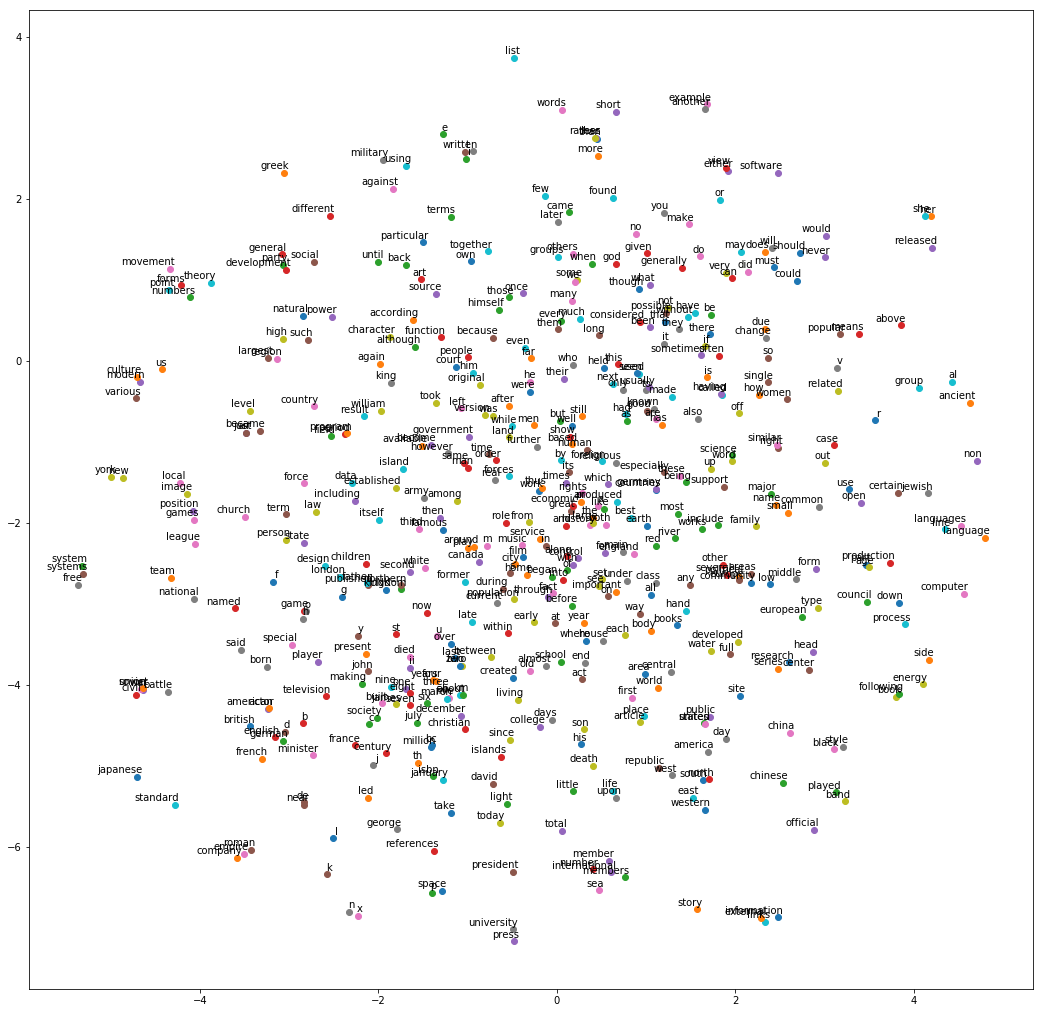

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

### Machine Translation

Below is an example of code that uses TensorFlow's `basic_rnn_seq2seq()` function in order to make an Encoder-Decoder model.

In [0]:
import tensorflow as tf

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.int32, (None, n_steps)) # English sentences.
  Y = tf.placeholder(tf.int32, (None, n_steps)) # French translations.
  W = tf.placeholder(tf.float32, (None, n_steps - 1, 1))

  Y_input = Y[:, :-1]
  Y_target = Y[:, 1:]

  encoder_inputs = tf.unstack(tf.transpose(X))
  decoder_inputs = tf.unstack(tf.transpose(Y_input))

  lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
                for _ in range(n_layers)]
  cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

  output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
      encoder_inputs,
      decoder_inputs,
      cell,
      num_encoder_symbols,
      num_decoder_symbols,
      embedding_size)
  
  logits = tf.transpose(tf.unstack(output_seqs), perm=(1, 0, 2))
  logits_flat = tf.reshape(logits, (-1, num_decoder_symbols))

  Y_target_flat = tf.reshape(Y_target, (-1,))
  W_flat = tf.reshape(W, (-1,))

  xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(
      labels=Y_target_flat, logits=logits_flat)
  loss = tf.reduce_mean(xentropy)

  optimizer = tf.train.AdamOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)

  init = tf.global_variables_initializer()